
# Project: LYFT 2019 Bike Ridership
Richard

In [1]:
# Import packages used.
import pandas as pd
import seaborn as sb
import numpy as np
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline

# Introduction

I am looking at trends regarding LYFT ridership during 2019.

- Subscriber: someone who subscribed to the service.
- Customer: someone who paid for each ride.

# Questions:
#### 1. When are most trips taken in terms of day of the week, or month of the year?
#### 2. How long does the average trip take?
#### 3. Does the above depend on whether a user is a subscriber or customer?

# Gathering Data

In [2]:
# Extract downloaded zip files and combine them into a dataframe
files = ['201901-fordgobike-tripdata.csv.zip','201902-fordgobike-tripdata.csv.zip',
         '201903-fordgobike-tripdata.csv.zip','201904-fordgobike-tripdata.csv.zip',
        '201905-baywheels-tripdata.csv.zip','201906-baywheels-tripdata.csv.zip',
        '201907-baywheels-tripdata.csv.zip','201908-baywheels-tripdata.csv.zip',
        '201909-baywheels-tripdata.csv.zip','201910-baywheels-tripdata.csv.zip',
        '201911-baywheels-tripdata.csv.zip','201912-baywheels-tripdata.csv.zip']
df = pd.DataFrame()
for file in files:
    with zipfile.ZipFile(file, 'r') as myzip:
        myzip.extractall()
    month = pd.read_csv(file[:-4],low_memory = False)
    df = pd.concat([df,month]) 

# Assessing Data

In [3]:
df.reset_index().head()

,index,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


In [4]:
# Data is mostly clean. 
# Need to drop columns and change data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506983 entries, 0 to 150101
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 306.0+ MB


# Cleaning Data

In [5]:
# Dropped unnecessary columns and modified data types
df = df[['duration_sec','start_time','user_type']]
df['start_time'] = pd.to_datetime(df['start_time'])
df['user_type'] = df['user_type'].astype('category')
df['month'] = pd.DatetimeIndex(df['start_time']).month
df['day_of_week'] = df['start_time'].dt.dayofweek

In [6]:
# Dictionaries for month and days of week
months = {1:'January', 2:'Febuary',3:'March',4:'April',5:'May',6:'June',7:'July',
          8:'August',9:'September',10:'October',11:'November',12:'December'}
day_of_week = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday'
               ,4:'Friday',5:'Saturday',6:'Sunday'}

In [7]:
# Replace numerical values to names
df['month'].replace(months, inplace = True)
df['day_of_week'].replace(day_of_week, inplace = True)

In [8]:
# Remove extreme outlier
df = df[df['duration_sec'] != df.duration_sec.max()]

In [9]:
df.head()

,duration_sec,start_time,user_type,month,day_of_week
0,80825,2019-01-31 17:57:44.613,Subscriber,January,Thursday
1,65900,2019-01-31 20:58:33.886,Subscriber,January,Thursday
2,62633,2019-01-31 18:06:52.924,Customer,January,Thursday
3,44680,2019-01-31 19:46:09.719,Customer,January,Thursday
4,60709,2019-01-31 14:19:01.541,Customer,January,Thursday


# Analysis

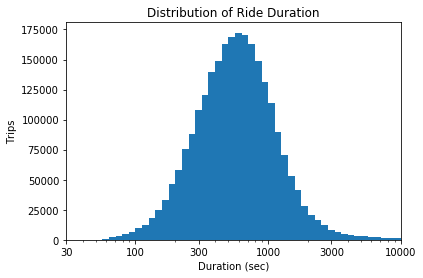

In [10]:
# Creating bin edges based on the data
bin_edges = 10**np.arange(0, np.log10(df.duration_sec.max())+0.05,0.05)
plt.hist(data = df,x = 'duration_sec',bins = bin_edges)
plt.xscale('log')
# Creating tick that are more readable
ticks = [30,100,300,1000,3000,10000,30000,100000]
plt.xticks(ticks,ticks)
plt.xlim(30,10000)
plt.title('Distribution of Ride Duration')
plt.xlabel('Duration (sec)')
plt.ylabel('Trips');

- Trip duration has a log-normal distribution that peaks around 600 seconds.

In [11]:
# Ordering data for plotting
week_order = pd.api.types.CategoricalDtype(ordered = True, categories = day_of_week.values())
df['day_of_week'] = df['day_of_week'].astype(week_order)

month_order = pd.api.types.CategoricalDtype(ordered = True, categories = months.values())
df['month']=df['month'].astype(month_order)

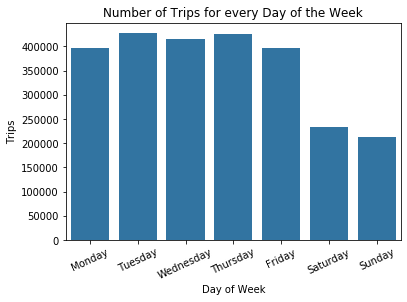

In [12]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'day_of_week',color = base_color)
plt.title('Number of Trips for every Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Trips')
plt.xticks(rotation = 25);

- There were more trips being made on weekdays when compared to weekends. 
- This could be because there were more people commuting during the weekdays. 

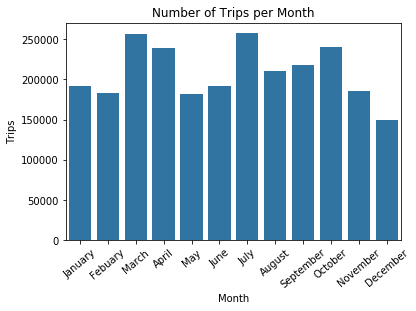

In [13]:
sb.countplot(data = df, x = 'month',color = base_color)
plt.title('Number of Trips per Month')
plt.xlabel('Month')
plt.ylabel('Trips')
plt.xticks(rotation = 40);

- Number of trips varied by month with peaks in the months of March and July. 
- The least amount of trips were made in December.

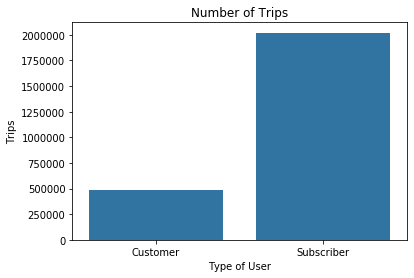

In [14]:
sb.countplot(data = df, x = 'user_type', color = base_color)
plt.title('Number of Trips')
plt.xlabel("Type of User")
plt.ylabel('Trips');

- Members (subscribers) made more trips than casual users (customers) in 2019.

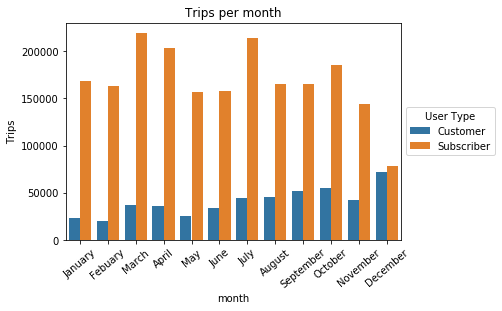

In [15]:
sb.countplot(data = df, x = 'month',hue = 'user_type')
plt.title('Trips per month')
plt.xlabel('month')
plt.ylabel('Trips')
plt.legend(title = 'User Type',loc = 6, bbox_to_anchor = (1,.5))
plt.xticks(rotation = 40);

- Number of trips made by subscribers went down significantly in December. 
- Number of trips made by customers went up. 
- This could be because commutes were less consistent in December so subscribers canceled their subscription and became customers.

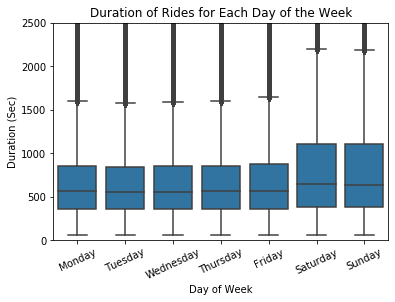

In [16]:
sb.boxplot(data = df, x = 'day_of_week', y = 'duration_sec', color = base_color)
plt.title('Duration of Rides for Each Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Duration (Sec)')
plt.xticks(rotation = 25)
plt.ylim(0,2500);

- Despite there being less trips made, the average duration of rides on weekends were longer than rides on weekdays.

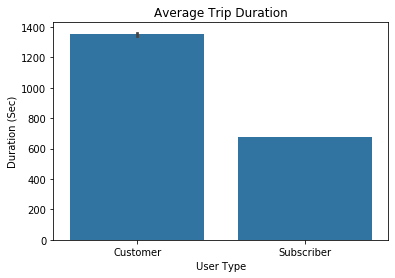

In [17]:
sb.barplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.title('Average Trip Duration')
plt.ylabel('Duration (Sec)')
plt.xlabel('User Type');

- Although customers made less trips, they had longer commutes.

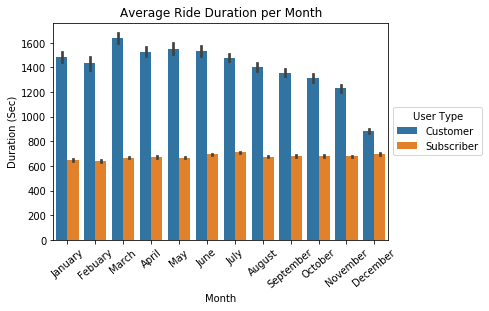

In [18]:
sb.barplot(data = df, x = 'month', y = 'duration_sec', hue = 'user_type')
plt.title('Average Ride Duration per Month')
plt.xlabel('Month')
plt.ylabel('Duration (Sec)')
plt.legend(title = 'User Type',loc = 6, bbox_to_anchor = (1,.5))
plt.xticks(rotation = 40);

- Customers, on average, had longer ride durations subscribers.
- Average trip duration also peaked in March. 
- In December the ride durations between customers and subscribers were the closest. 
- The average duration of trips were constant for subscribers.

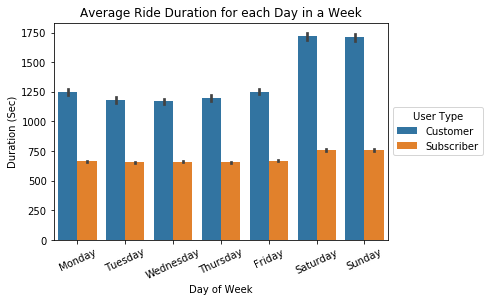

In [19]:
sb.barplot(data = df, x = 'day_of_week', y = 'duration_sec', hue = 'user_type')
plt.title('Average Ride Duration for each Day in a Week')
plt.xlabel('Day of Week')
plt.ylabel('Duration (Sec)')
plt.legend(title = 'User Type',loc = 6, bbox_to_anchor = (1,.5))
plt.xticks(rotation = 25);

- When comparing day of the week, you can still see that customers took longer trips than subscribers. 
- There was a spike in average ride duration during the weekends.

# Conclusions
1. March and July had the highest number of trips. December had the lowest. Trips in March took the longest.
2. There were more trips being made on weekdays than weekends but trips made on weekends took longer.
3. There were significantly more subscribers than customers in 2019. However customers took longer trips (average 1300 seconds).
4. The Average trip duration made by subscribers was constant in 2019 (700 seconds) 
5. Customers still had longer trips than subscribers when accounting for month and day of week. 
